#Librerias

In [ ]:
!pip install opencv-python # instala la librería OpenCV para procesamiento de imágenes

In [ ]:
# Librerías para manejo y procesamiento numérico y de imágenes
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random

# Librerías para manejo de archivos y sistema operativo
import os
import sys
from os import listdir
from os.path import join
import shutil

# Librerías para control de progreso y gestión de modelos
from tqdm import tqdm
import joblib

# Librerías para machine learning (modelado y evaluación)
from sklearn.model_selection import train_test_split

# Conectar con google drive

In [ ]:
# conectar con Google Drive para acceder a archivos desde Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones" ### ruta del repositorio en drive
os.chdir(path) ### volver la carpeta del repositorio directorio de trabajo
sys.path.append(path) ### agregarla al path, poder leer archivos de funciones propios como paquetes

In [ ]:
import _funciones as fn #Llamar el archivo de funciones de este proyecto

# Visualización previa de imágenes y sus atributos

In [ ]:
img_benign=cv2.imread('/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Data/benign/0200.jpg') # cargar imagen benigna desde Drive para visualizacion
img_malignant=cv2.imread('/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Data/malignant/0000.jpg') # cargar imagen maligna  desde Drive para visualizacion

## Visualización imágen benigna

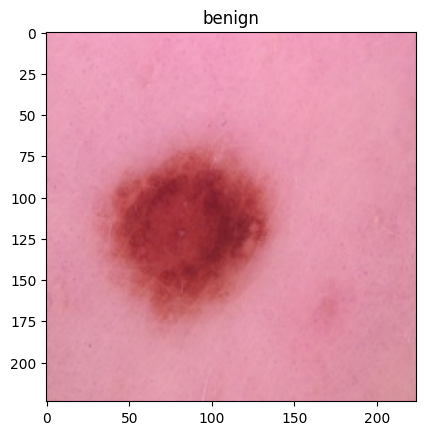

In [ ]:
img_benign_rgb = cv2.cvtColor(img_benign, cv2.COLOR_BGR2RGB) # convertir imagen benigna de BGR a RGB
plt.imshow(img_benign_rgb) # mostrar imagen benigna en formato RGB
plt.title('benign') # título de la imagen
plt.show() #Mostrar en pantalla

In [ ]:
img_benign_rgb.shape ### tamaño de imágenes benignas

(224, 224, 3)

In [ ]:
img_benign_rgb.max() ### máximo valor de intensidad en un pixel en las imagenes benignas

np.uint8(252)

In [ ]:
img_benign_rgb.min() ### mínimo valor de intensidad en un pixel en las imagenes benignas

np.uint8(27)

In [ ]:
np.prod(img_benign_rgb.shape) # calcular el total de píxeles multiplicando alto × ancho × canales

np.int64(150528)

### Redimensionamiento imágen benigna de ejemplo

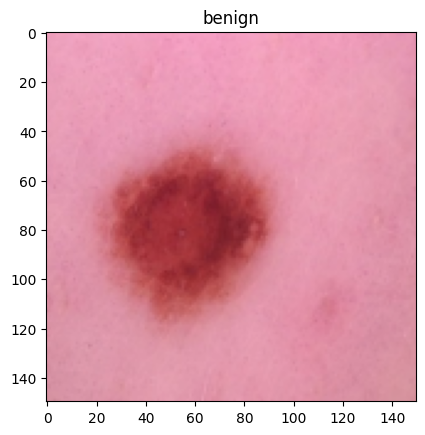

np.int64(67500)

In [ ]:
img_benign_rgb_r = cv2.resize(img_benign_rgb ,(150,150)) # redimensionar imagen benigna a 150x150 píxeles
plt.imshow(img_benign_rgb_r) # mostrar imagen redimensionada
plt.title('benign') # título de la imagen
plt.show() # mostrar la imagen en pantalla
np.prod(img_benign_rgb_r.shape) # calcular el total de píxeles de la imagen redimensionada

## Visualización imágen maligna

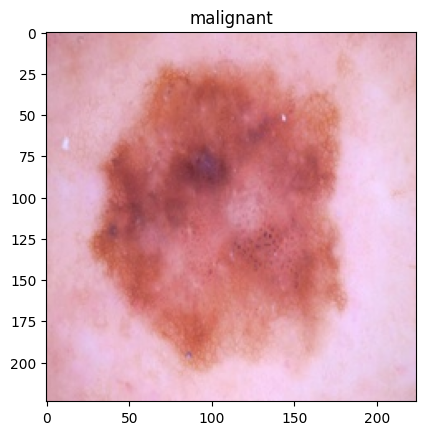

In [ ]:
img_malignant_rgb = cv2.cvtColor(img_malignant, cv2.COLOR_BGR2RGB)  # convertir imagen maligna de BGR a RGB
plt.imshow(img_malignant_rgb)  # mostrar imagen maligna en formato RGB
plt.title('malignant')  # título de la imagen
plt.show()  # mostrar la imagen en pantalla

In [ ]:
img_malignant_rgb.shape ### tamaño de imágenes malignas

(224, 224, 3)

In [ ]:
img_malignant_rgb.max() ### máximo valor de intensidad en un pixel en las imagenes malignas

np.uint8(255)

In [ ]:
img_malignant_rgb.min() ### mínimo valor de intensidad en un pixel en las imagenes malignas

np.uint8(41)

In [ ]:
np.prod(img_malignant_rgb.shape)  # calcular el total de píxeles multiplicando alto × ancho × canales de la imagen maligna

np.int64(150528)

### Redimensionamiento imágen maligna de ejemplo

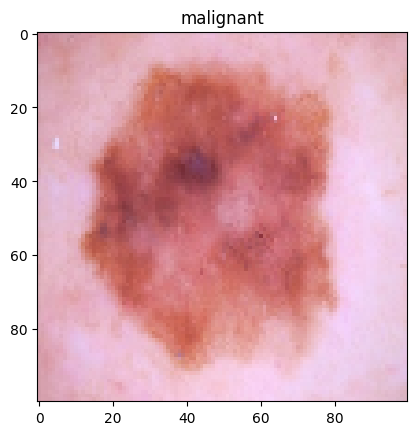

np.int64(30000)

In [ ]:
img_malignant_rgb_r = cv2.resize(img_malignant_rgb, (100, 100))  # redimensionar imagen maligna a 100x100 píxeles
plt.imshow(img_malignant_rgb_r)  # mostrar imagen maligna redimensionada
plt.title('malignant')  # título de la imagen
plt.show()  # mostrar la imagen en pantalla
np.prod(img_malignant_rgb_r.shape)  # calcular el total de píxeles de la imagen redimensionada

# Redimensionamiento de todas las imagenes

In [ ]:
width = 120  # ancho deseado para redimensionar imágenes
num_classes = 2  # número de clases: benign y malignant
benignpath = '/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Data/benign'  # ruta a imágenes benignas
malignantpath = '/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Data/malignant'  # ruta a imágenes malignas

In [ ]:
rawImgs_b,labels_b,files_list_b=fn.load_images(benignpath,width) # cargar imágenes benignas con tamaño definido

100%|██████████| 1600/1600 [00:55<00:00, 28.68it/s] 


In [ ]:
rawImgs_m,labels_m,files_list_m=fn.load_images(malignantpath,width) # cargar imágenes malignas con tamaño definido

100%|██████████| 1297/1297 [01:09<00:00, 18.61it/s] 


Train y Test deben tener ambos tipos de imagenes en un porcentaje, test siendo uno menor. rawImgs tiene los vectores (serian x_train y x_test),
y labels serian y_train y y_test.

# Unir listas de imagenes y crear variables de entrenamiento y prueba

In [ ]:
# Combinar imágenes y etiquetas de ambas clases
all_images = rawImgs_b + rawImgs_m  # unir listas de imágenes benignas y malignas
all_labels = labels_b + labels_m    # unir listas de etiquetas correspondientes

X = np.array(all_images)  # convertir lista de imágenes a arreglo NumPy
y = np.array(all_labels)  # convertir lista de etiquetas a arreglo NumPy

# Dividir datos en 80% entrenamiento y 20% prueba, con mezcla aleatoria y semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train.shape # dimensiones del conjunto de entrenamiento (número de imágenes, ancho, alto, canales)

(2317, 120, 120, 3)

In [ ]:
X_test.shape # dimensiones del conjunto de prueba (número de imágenes, ancho, alto, canales)

(580, 120, 120, 3)

In [ ]:
y_train.shape # forma del vector de etiquetas del conjunto de entrenamiento

(2317, 1)

In [ ]:
y_test.shape # forma del vector de etiquetas del conjunto de prueba

(580, 1)

# Exportar conjuntos de datos de entrenamiento y prueba

Se exportan las imágenes en forma de array para después ser utilizadas en los modelos.

In [ ]:
joblib.dump(X_train, "/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/X_train.pkl")  # guardar conjunto de entrenamiento de imágenes
joblib.dump(y_train, "/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/y_train.pkl")  # guardar etiquetas de entrenamiento
joblib.dump(X_test, "/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/X_test.pkl")    # guardar conjunto de prueba de imágenes
joblib.dump(y_test, "/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/y_test.pkl")    # guardar etiquetas de prueba

['/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/y_test.pkl']